In [1]:
%pip install langchain --upgrade
%pip install langchain-google-genai --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI as genai_chat

In [3]:
load_dotenv()

True

In [4]:
from IPython.display import Markdown
import textwrap

In [5]:

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def stream_markdown(llm, prompt):
    """
    Stream llm responses and convert to Markdown.

    :param llm: LLaMA model instance
    :param prompt: Input prompt
    :yield: Markdown formatted chunks
    """
    for chunk in llm.stream(prompt):
        text = chunk.content.replace('•', '  *')
        yield Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))




In [19]:
from langchain_core.messages import HumanMessage, SystemMessage
model_name = "models/gemini-2.0-flash-exp"
# 'gemini-1.5-pro-latest'
model = genai_chat(model=model_name)

In [20]:
def classify_produce(given_item = "apple"):
    msgs =[
            SystemMessage(content=["You are fruit identifier."]),
            HumanMessage(content=["You MUST limit your answer to Yes/No.",
                                   f"Is {given_item} a fruit?"]),
    ]
    response = model.invoke(msgs)
    return response.content

print(classify_produce())

Yes


In [21]:
item = "cucumber"
print(classify_produce(item))

Yes.


In [22]:
llm = genai_chat(model='models/gemini-2.0-flash', temperature=0.5)

# Send a creative prompt to the LLM
prompt = 'Write a paragraph about the importance of prompt engineering.'
response = llm.invoke(prompt)
response.content

"Prompt engineering is rapidly becoming a crucial skill in the age of large language models (LLMs). It's the art and science of crafting effective prompts that elicit desired outputs from these powerful AI systems. Well-engineered prompts can unlock the full potential of LLMs, enabling users to generate high-quality content, automate complex tasks, extract valuable insights, and even personalize user experiences. Without thoughtful prompt design, users risk receiving generic, inaccurate, or irrelevant responses, highlighting the importance of mastering this skill to effectively harness the capabilities of AI."

In [25]:
llm1 = genai_chat(model='models/gemini-2.0-flash', temperature=0.5)

messages = [
        SystemMessage(content=["You are an evaluator of questions and answers."]),
        HumanMessage(content=[f"Question: {prompt}",
                              f"Answer:{response.content}",
                              "Look at the question and evaluate the answer.",
                              "Check for accuracy and relevance."
                              "Target audience for the answer is analytics professionals."]),
]

response1 = llm1.invoke(messages)
response1.content

"**Evaluation:**\n\nThe answer is accurate, relevant, and well-written, especially considering the target audience of analytics professionals. Here's a breakdown:\n\n*   **Accuracy:** The answer correctly describes prompt engineering and its role in interacting with LLMs. It accurately highlights the potential benefits and risks associated with good and bad prompt design.\n*   **Relevance:** The answer directly addresses the question of the importance of prompt engineering. It explains why it's becoming a crucial skill.\n*   **Target Audience Appropriateness:** The language used is suitable for analytics professionals. It avoids overly technical jargon while still conveying the core concepts. The mention of automating complex tasks and extracting valuable insights would resonate well with this audience.\n*   **Clarity and Conciseness:** The paragraph is clear, concise, and easy to understand. It effectively summarizes the key aspects of prompt engineering's importance.\n*   **Completen

In [26]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Set up a prompt template
prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {input}')

# Create a chain that utilizes both the LLM and the prompt template
# chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
chain = prompt | llm1
topic = 'Why AI will change the world.'
response = chain.invoke(input=topic)
print(response.content)

AI is poised to revolutionize everything! From healthcare & education to art & business, its potential is boundless. We're on the cusp of a new era driven by innovation & efficiency. Buckle up, the future is AI-powered! 🚀 #AI #ArtificialIntelligence #Innovation #FutureTech #TechRevolution


In [27]:
this_animal = 'whale'
output = llm1.invoke([
    SystemMessage(content='You are an animal classifier.'),
    HumanMessage(content=["Example: Tiger is a Mammal.",]),
    HumanMessage(content=['Answer only YES or NO in Spanish.',
        f'Is {this_animal} a mammal?'])
])
print(output.content)

SÍ.


In [28]:
# Send a prompt requiring detailed, continuous output
print(llm.model)
prompt = 'Write a scientific paper outlining the mathematical foundation of our universe.'
for markdown_chunk in stream_markdown(llm, prompt):
    display(markdown_chunk)

models/gemini-2.0-flash


> ##

>  The Mathematical Foundations

>  of the Universe: A Synthesis of Current Theories
> 
> **Abstract:** This paper explores

>  the hypothesis that the universe is fundamentally mathematical, built upon a bedrock of abstract structures

>  and governed by mathematical laws. We examine the current leading theories of physics, including General Relativity, Quantum Field Theory, and String Theory, highlighting their mathematical underpinnings

>  and potential for unification. We discuss the role of information theory, computational complexity, and the potential for a "Theory of Everything" rooted in a fundamental mathematical principle. Finally

> , we explore the implications of this perspective for our understanding of reality and the nature of consciousness.
> 
> **1. Introduction: The Mathematical Universe Hypothesis**
> 
> The idea that the universe is fundamentally mathematical, often referred to as the Mathematical Universe Hypothesis (

> MUH), proposes that our physical reality is not merely described by mathematics, but *is* mathematics. This perspective, championed by physicists like Max Tegmark, suggests that every mathematically consistent structure exists as a physical universe. Our universe, therefore

> , is just one specific mathematical structure realized in physical form.
> 
> This hypothesis stems from the observation that the laws of physics are expressed with remarkable precision and elegance through mathematical equations. From Newton's laws of motion to Einstein's theory of General Relativity, mathematics provides the language and framework for understanding the behavior of the universe

> . This paper aims to delve into the mathematical structures that underpin our current understanding of the universe and explore potential avenues for a unified mathematical description.
> 
> **2. General Relativity: Geometry as Gravity**
> 
> Einstein's General Relativity (GR) revolutionized our understanding of gravity, replacing Newton's force with the curvature of spacetime.

>  The mathematical foundation of GR lies in **differential geometry**, specifically **Riemannian geometry**.
> 
> *   **Manifolds:** Spacetime is modeled as a four-dimensional differentiable manifold, a space that locally resembles Euclidean space but can have a complex global structure.
> *   **Metric Tensor (g<sub>μν</sub>):**

>  This tensor defines the geometry of spacetime, determining distances and angles. Gravity is encoded in the curvature of this metric.
> *   **Einstein Field Equations:** These equations relate the curvature of spacetime, represented by the Einstein tensor (G<sub>μν</sub>), to the distribution of matter and energy, represented by the stress-energy tensor

>  (T<sub>μν</sub>):
> 
>     ```
>     G<sub>μν</sub> + Λg<sub>μν</sub> = (8πG/c<sup>4</sup>)T<sub>μν</sub>
>     ```
> 
>     Where:
>     *   G<sub>μν</sub> is the Einstein tensor, derived from the Riemann

>  curvature tensor.
>     *   Λ is the cosmological constant, representing the energy density of empty space.
>     *   G is the gravitational constant.
>     *   c is the speed of light.
> 
> The mathematical elegance of GR lies in its ability to describe gravity as a geometric property of spacetime. However, GR

>  breaks down at singularities, such as the center of black holes, indicating the need for a more fundamental theory.
> 
> **3. Quantum Field Theory: Fields as Fundamental Entities**
> 
> Quantum Field Theory (QFT) provides the framework for understanding the fundamental particles and forces of nature. Unlike classical physics, QFT treats particles as

>  excitations of underlying quantum fields.
> 
> *   **Quantum Fields (ψ(x)):** These fields permeate all of space and time, and their quantized excitations correspond to particles. Examples include the electron field, the photon field, and the Higgs field.
> *   **Lagrangian Density (ℒ):** This function describes

>  the dynamics of the quantum fields and their interactions. The equations of motion are derived by minimizing the action, which is the integral of the Lagrangian density over spacetime.
> *   **Path Integral Formulation:** This formulation, developed by Feynman, calculates probabilities by summing over all possible paths a particle can take, weighted by a phase

>  factor determined by the action.
> 
> QFT is incredibly successful in describing the Standard Model of particle physics, which encompasses the electromagnetic, weak, and strong forces. However, QFT struggles to incorporate gravity, leading to the need for a theory that can unify QFT and GR.
> 
> **4. String Theory: Vibr

> ating Strings as Fundamental Objects**
> 
> String Theory proposes that the fundamental constituents of the universe are not point-like particles, but tiny, vibrating strings. This seemingly simple change has profound implications for the mathematical structure of the universe.
> 
> *   **Higher Dimensions:** String theory requires extra spatial dimensions beyond the three we perceive.

>  These extra dimensions are thought to be compactified, curled up at extremely small scales.
> *   **Calabi-Yau Manifolds:** These complex, six-dimensional manifolds are often invoked as the geometry of the compactified extra dimensions in string theory.
> *   **Supersymmetry:** String theory naturally incorporates supersymmetry, a

>  symmetry that relates bosons and fermions.
> 
> String theory offers the potential to unify GR and QFT by providing a consistent quantum theory of gravity. However, it is still under development and lacks direct experimental verification. Its mathematical complexity is immense, involving advanced concepts from topology, geometry, and number theory.
> 
> **5. Information

>  Theory and Computational Complexity: The Universe as Computation?**
> 
> Recent research suggests that information theory and computational complexity may play a fundamental role in understanding the universe.
> 
> *   **Information as a Physical Quantity:** Landauer's principle states that erasing one bit of information requires a minimum amount of energy dissipation. This suggests that

>  information is a physical quantity with tangible consequences.
> *   **Holographic Principle:** This principle suggests that the information content of a region of space is encoded on its boundary. This has implications for the nature of gravity and black holes.
> *   **Computational Complexity:** The complexity of simulating physical systems may provide insights into the fundamental

>  laws of physics. For example, some theories suggest that the universe is governed by principles of computational efficiency.
> 
> These ideas suggest that the universe may be viewed as a vast computational process, with information being the fundamental currency. This perspective could potentially bridge the gap between the abstract realm of mathematics and the physical reality we observe.
> 
> **

> 6. Towards a Theory of Everything: The Search for a Fundamental Mathematical Principle**
> 
> The ultimate goal of theoretical physics is to find a "Theory of Everything" (TOE), a unified theory that encompasses all the fundamental forces and particles of nature. Many physicists believe that a TOE must be rooted in a fundamental mathematical principle.

> 
> 
> *   **Category Theory:** This abstract branch of mathematics deals with relationships between mathematical structures. Some researchers believe that category theory may provide the framework for a TOE.
> *   **E8 Lie Group:** This exceptional Lie group has been proposed as a potential symmetry structure underlying the Standard Model and gravity.
> *   

> **Quantum Gravity:** Developing a consistent theory of quantum gravity remains a major challenge. Loop Quantum Gravity and String Theory are two competing approaches, each with its own mathematical framework.
> 
> The search for a TOE is an ongoing endeavor, driven by the belief that the universe is ultimately governed by a simple and elegant mathematical principle.
> 
> **7

> . Implications and Conclusion: The Nature of Reality and Consciousness**
> 
> The Mathematical Universe Hypothesis has profound implications for our understanding of reality and the nature of consciousness.
> 
> *   **Reality as a Mathematical Structure:** If the universe is fundamentally mathematical, then reality is not something external to mathematics, but rather a specific instantiation of a

>  mathematical structure.
> *   **The Role of Consciousness:** The relationship between consciousness and the mathematical universe is a subject of ongoing debate. Some theories suggest that consciousness may be a fundamental aspect of reality, arising from complex mathematical structures.
> *   **The Limits of Knowledge:** Even if the universe is fundamentally mathematical, there may

>  be inherent limitations to our ability to understand it completely. Gödel's incompleteness theorems suggest that any sufficiently complex mathematical system will contain statements that are true but unprovable within the system.
> 
> In conclusion, the hypothesis that the universe is fundamentally mathematical provides a powerful and compelling framework for understanding the nature of reality. While

>  many challenges remain, the ongoing exploration of the mathematical foundations of the universe promises to reveal deeper insights into the fundamental laws that govern our existence. The quest for a unified mathematical description of the universe is not merely an academic exercise, but a profound exploration of the very nature of reality itself.
> 
> **8. Future Directions:**

> 
> 
> *   Further development of String Theory and Loop Quantum Gravity to resolve the conflict between GR and QFT.
> *   Exploration of the role of information theory and computational complexity in shaping the laws of physics.
> *   Investigation of the mathematical structures underlying consciousness and its relationship to the physical universe.
> *   Development of new

>  mathematical tools and techniques to tackle the challenges of understanding the universe at its most fundamental level.
> 
> This paper provides a glimpse into the fascinating and complex world of the mathematical foundations of the universe. The journey to unravel the ultimate mathematical structure of reality is far from over, but the progress made so far offers hope that we may

>  one day achieve a complete and unified understanding of the cosmos.

In [29]:
img_url = "https://www.sju.edu/news/sites/newsroom/files/styles/16_9_1600x900/public/2024-05/Ryan-Cesarini-sju-mbb_3200x1800.jpg?h=0fb54712&itok=XexLTQ2F"
#"https://www.sju.edu/news/sites/newsroom/files/styles/16_9_1600x900/public/2024-06/bonnie-yu-lacrosse_3200x1800.jpg?h=f0fb51a5&itok=1ZLMRAtS"

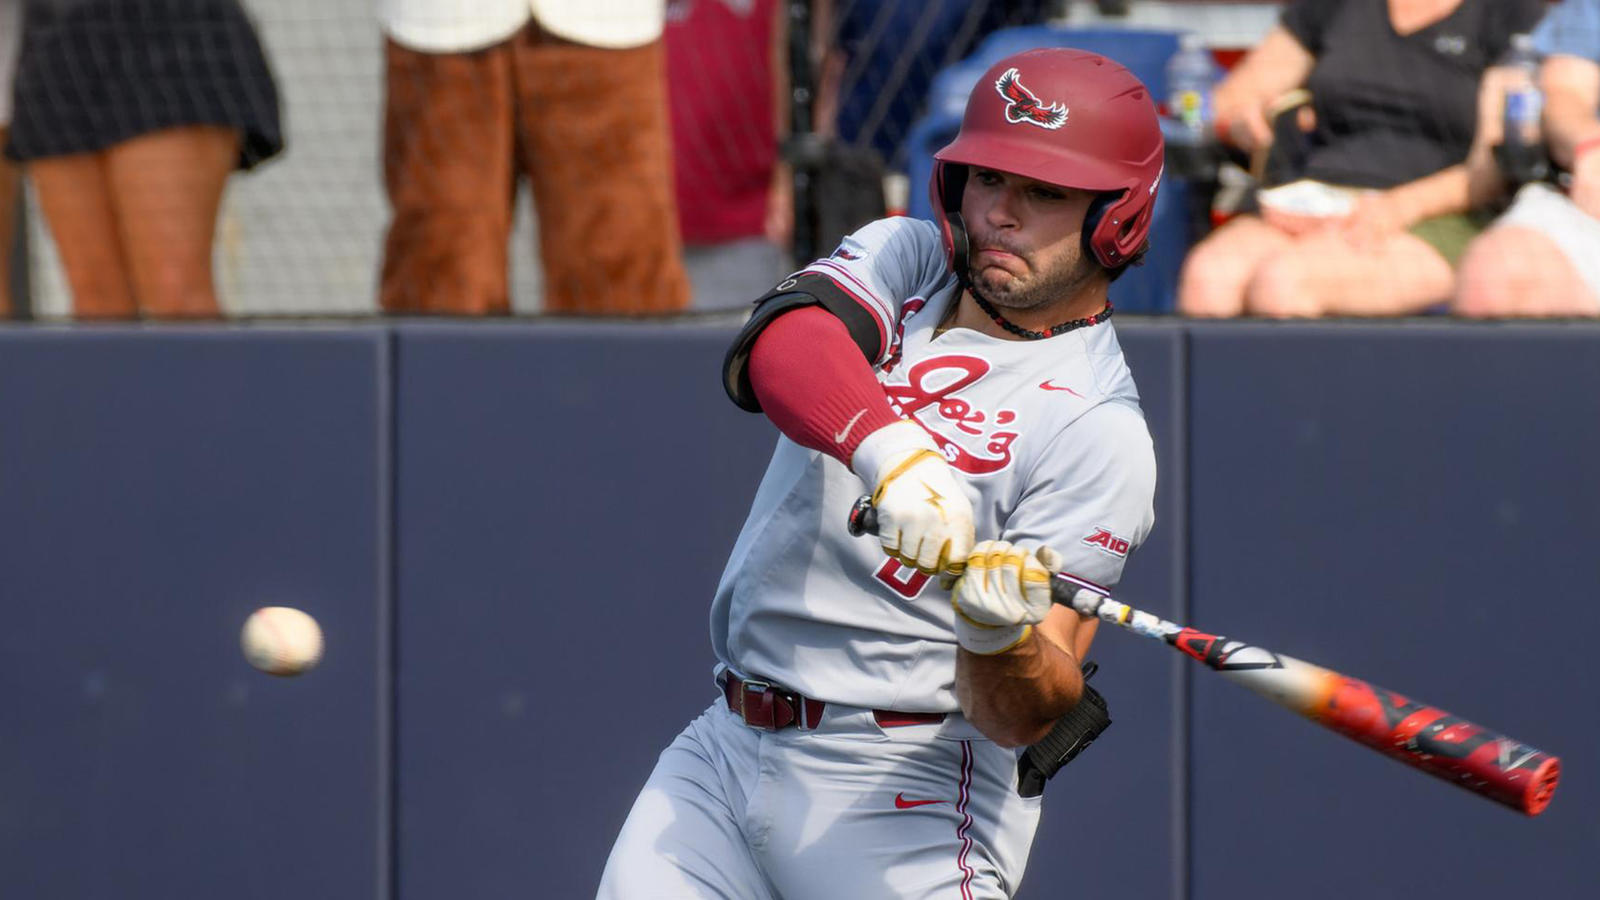

In [30]:
import requests
from IPython.display import Image

# image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(img_url).content
Image(content)

In [31]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": img_url},
    ]
)
msg = llm.invoke([message])
msg.content

"The image shows a baseball player in a grey uniform with maroon accents swinging a bat.  He's wearing a maroon helmet with a bird logo. The background is blurred but shows spectators in the stands and a dark blue wall. A baseball is visible in the air, seemingly just hit by the batter."

In [34]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
            "text": "Can you identify any logos in this image?"
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": img_url},
    ]
)
msg = llm.invoke([message])
print(msg.content)

The image contains the following logos:

* **Nike Swoosh:**  Visible on the baseball player's sleeve and pants.
* **Louisville Slugger:** This is on the baseball bat.  It's partially visible but identifiable.
* **The Arizona State University Sun Devils logo:** This is on the player's helmet.  It's a stylized "Sparky" the Sun Devil.  A portion is visible on the side of the helmet.
